# import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# path to string

In [2]:
path = r'C:\Users\leevg\OneDrive\Desktop\CF\DI\A4\03-2022 Instacart Basket Analysis'

# import data

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

In [4]:
ords_prods_merge.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,department_id,prices,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_user_price,spending_flag,order_frequency,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,7,9.0,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,7,9.0,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,7,9.0,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,7,9.0,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,7,9.0,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,7,9.0,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,7,9.0,Busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,7,9.0,Busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,7,9.0,Busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,7,9.0,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


# creating bar charts

<AxesSubplot:>

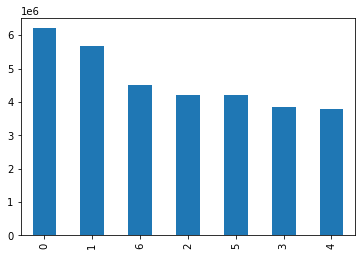

In [5]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

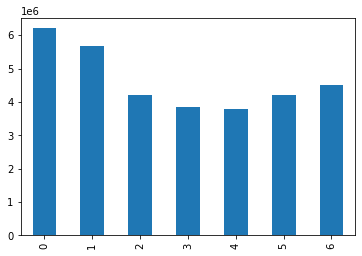

In [6]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

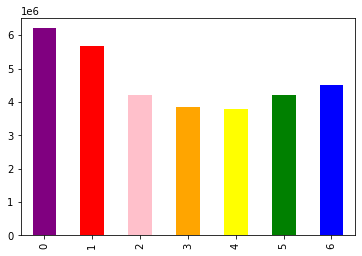

In [7]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# export chart

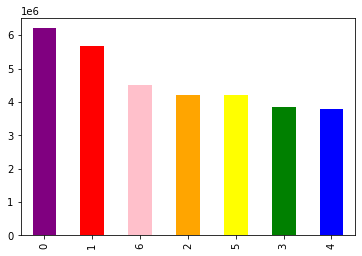

In [8]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# create histograms and scatterplots

<AxesSubplot:ylabel='Frequency'>

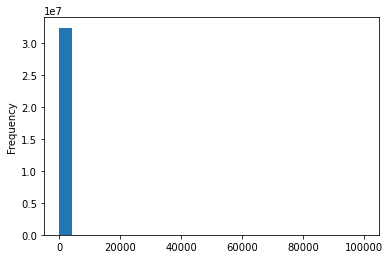

In [10]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

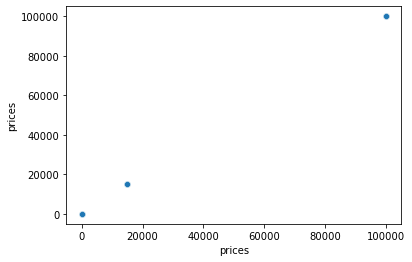

In [11]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

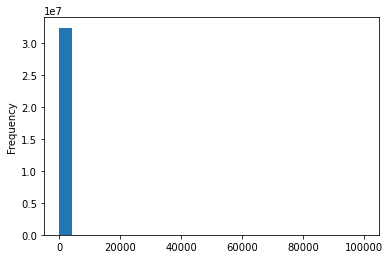

In [12]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

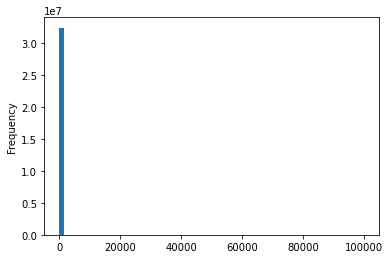

In [13]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [14]:
# export histograms

In [15]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_prices.png'))

In [16]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_prices_2.png'))

# sampling data

In [17]:
np.random.seed(4)

In [18]:
# create list holding T/F values to the test np.random.rand() <= 0.7

In [19]:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [20]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [21]:
# store 70% of sample in the dataframe big

In [22]:
big = ords_prods_merge[dev]

In [23]:
# store 30% of sample in the dataframe small

In [24]:
small = ords_prods_merge[~dev]

In [25]:
# check lengths

In [26]:
len(ords_prods_merge)

32404859

In [27]:
len(big) + len(small)

32404859

In [28]:
# reduce samples

In [29]:
df_2 = small[['orders_day_of_week', 'prices']]

In [30]:
# create chart

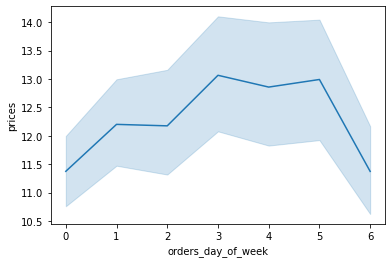

In [31]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [32]:
df_4 = ords_prods_merge[['orders_day_of_week', 'prices']]

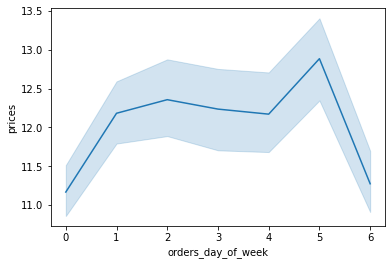

In [33]:
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week', y = 'prices')